<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Miniproyecto</p></tp>
            <tp><p style="font-size:150%;text-align:center">Europeos e Indígenas </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Europeos e Indígenas <a class="anchor" id="inicio"></a>

En este notebook vamos a aplicar algunos de los algoritmos de búsqueda para encontrar la solución más óptima al problema de los eropeos e indígenas. 


## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Estrategia de búsqueda Breadth first search ](#breadth).
* [Estrategia de búsqueda Depth first search ](#depth).
* [Estrategia de búsqueda Iterative_deepening_search](#iterative).
* [Estrategia de búsqueda Depth limited search](#limited).
* [Comparación de tiempos](#compara).




In [114]:
from AmbientesMP import IndigenasEuropeos
from busqueda import *
from random import choice

[[2, 1, -1], [2, -1, 0], [2, -1, -1]]


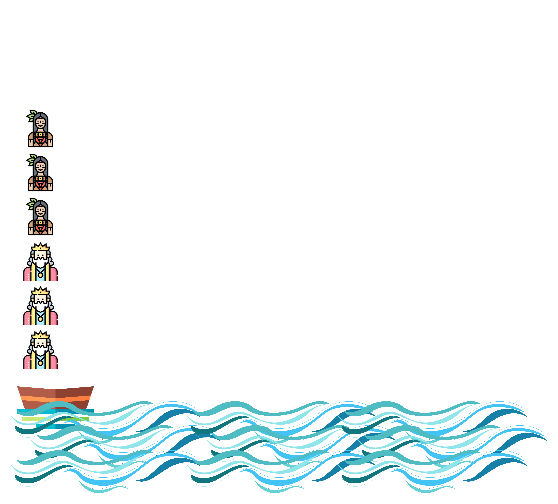

In [80]:
prob = IndigenasEuropeos()
s = prob.estado_inicial
prob.pintar_estado(s)
print(prob.acciones_aplicables(s))

In [81]:
def camino_estados (prob,n):
    estados = []
    estados.append(n.estado)
    while n.madre != None:
        madre = n.madre
        estados.append(madre.estado)
        n = n.madre
    estados.reverse()
    return estados

## Breadth-first search <a class="anchor" id="breadth"></a>
    
([Volver al inicio](#inicio))

La busqueda en anchura despues de expandir el estado inicial expande y verifica todos los hijos antes de expandir cualquier nieto.

    



In [82]:
def breadth_first_search(problema):

    '''Función de búsqueda breadth-first'''

    nodo = Nodo(problema.estado_inicial, None, None, 0, problema.codigo(problema.estado_inicial))
    if problema.test_objetivo(nodo.estado):
            return nodo
    frontera = [nodo]
    explorados = []
    while len(frontera) > 0:
        nodo = frontera.pop(0)
        explorados.append(nodo.codigo)
        acciones = problema.acciones_aplicables(nodo.estado)
        for a in acciones:
            hijo = nodo_hijo(problema, nodo, a)
            if problema.test_objetivo(hijo.estado):
                return hijo
            if hijo.codigo not in explorados:
                frontera.append(hijo)
    return None

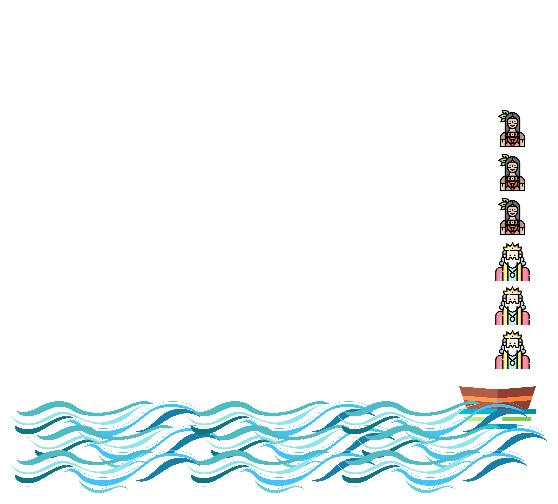

CPU times: total: 33.7 s
Wall time: 43.1 s


In [83]:
%%time
l = breadth_first_search(prob)

if l is not None:
    camino_acciones = solucion(l)
    print("La solución encontrada es: ", camino_acciones)
else:
    print("No hay solución!")

print(l.estado)  

estados = camino_estados(prob,l)
print(estados)
prob.pintar_camino(estados,camino_acciones)    


---

## Depth_first_search <a class="anchor" id="depth"></a>

([Volver al inicio](#inicio))

La busqueda en profundidad desde el estado inicial recorre por el camino mas a la derecha del arbol expandiendo hasta el nodo de mayor profundidad y regresando si no se se encuentra solucion.

In [66]:
def depth_first_search(problema):

    '''Función de búsqueda depth-first'''

    nodo = Nodo(problema.estado_inicial, None, None, 0, problema.codigo(problema.estado_inicial))
    if problema.test_objetivo(nodo.estado):
            return nodo
    frontera = [nodo]
    explorados = []
    while len(frontera) > 0:
        nodo = frontera.pop()
        explorados.append(nodo.codigo)
        acciones = problema.acciones_aplicables(nodo.estado)
        for a in acciones:
            hijo = nodo_hijo(problema, nodo, a)
            if problema.test_objetivo(hijo.estado):
                return hijo
            if hijo.codigo not in explorados:
                frontera.append(hijo)
    return None

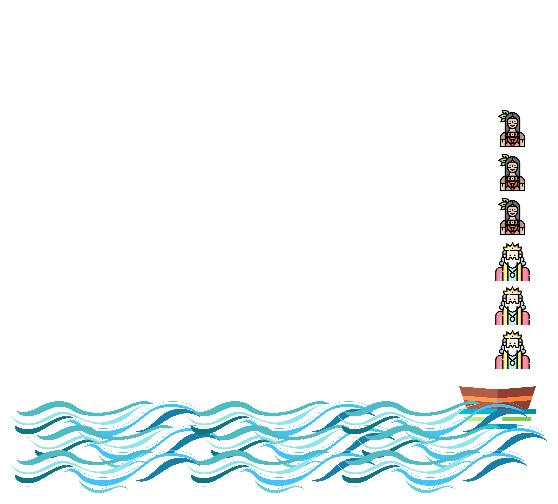

In [84]:
l = depth_first_search(prob)
if l is not None:
    camino_acciones = solucion(l)
    print("La solución encontrada es: ", camino_acciones)
else:
    print("No hay solución!")

print(l.estado)  

estados = camino_estados(prob,l)
print(estados)
prob.pintar_camino(estados,camino_acciones) 
    

##  Iterative deepening search <a class="anchor" id="iterative"></a>

([Volver al inicio](#inicio))

Usa el algoritmo de Dijkstra para expandir el nodo mas prometedor de acuerdo a una funcion de costo.

In [118]:
def iterative_deepening_search(problema, l_max):
    for i in range (0, l_max+1):
        resultado = depth_limited_search(problema, i)
        if resultado != "Cutoff":
            return resultado 

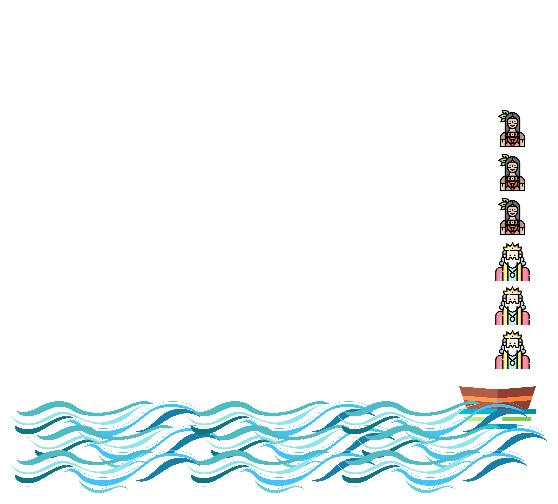

In [119]:
for profundidad in range(1,12):
    print ("Buscando hasta profundidad", profundidad, "...")
    l = iterative_deepening_search(prob, profundidad)
    if l is not None:
        if l == 'Cutoff':
            print ("No se encontró solución a esa profundidad!")
        else:
            camino_acciones = solucion(l)
            estados = camino_estados(prob,l)
            print("La solución encontrada es: ", camino_acciones)
            prob.pintar_camino(estados,camino_acciones)
            break
    else:
        print("No hay solucion!")
        

## Depth_limited_search <a class="anchor" id="limited"></a>

([Volver al inicio](#inicio))

Usa el algoritmo de Dijkstra para expandir el nodo mas prometedor de acuerdo a una funcion de costo.

In [116]:
def expand(problema, nodo):
    s = nodo.estado
    nodos = []
    for accion in problema.acciones_aplicables(s):
        hijo = nodo_hijo(problema, nodo, accion)
        nodos.append(hijo)
    return nodos

def depth_limited_search(problema, l):
    nodo = Nodo(problema.estado_inicial, None, None, 0, problema.codigo(problema.estado_inicial))
    frontera = [nodo]
    resultado = "Falla"
    while len(frontera) > 0:
        nodo = frontera.pop()
        if problema.test_objetivo(nodo.estado):
            return nodo
        if depth(nodo) >= l:
            resultado = "Cutoff"
        elif is_cycle(nodo) == False:
            for hijo in expand(problema, nodo):
                frontera.append(hijo)
    return resultado

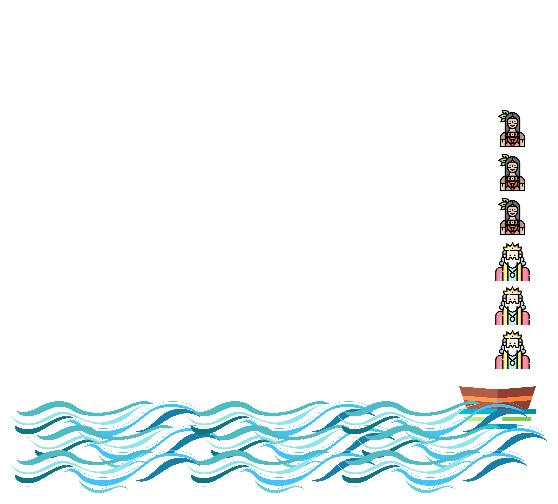

In [117]:
for profundidad in range(1,12):
    print ("Buscando hasta profundidad", profundidad, "...")
    l = depth_limited_search(prob, profundidad)
    if l is not None:
        if l == 'Cutoff':
            print ("No se encontró solución a esa profundidad!")
        else:
            camino_acciones = solucion(l)
            estados = camino_estados(prob,l)
            print("La solución encontrada es: ", camino_acciones)
            prob.pintar_camino(estados,camino_acciones)
            break
    else:
        print("No hay solucion!") 
        


## Comparación de tiempos <a class="anchor" id="compara"></a>

([Volver al inicio](#inicio))



In [120]:
from time import time

def obtiene_tiempos(fun, args, num_it=100):
    tiempos_fun = []
    for i in range(num_it):
        arranca = time()
        x = fun(*args)
        para = time()
        tiempos_fun.append(para - arranca)
    return tiempos_fun

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

def compara_funciones(funs, arg, nombres, N=30):
    nms = []
    ts = []
    for i, fun in enumerate(funs):
        nms += [nombres[i] for x in range(N)]
        ts += obtiene_tiempos(fun, [arg], N)
    data = pd.DataFrame({'Función':nms, 'Tiempo':ts})
    return data
    

              sum_sq     df           F         PR(>F)
C(Función)  0.002319    3.0  5177.34768  2.484587e-123
Residual    0.000017  116.0         NaN            NaN


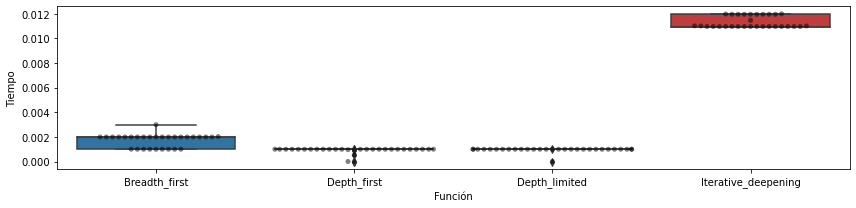

In [122]:
from busqueda import *
import warnings
warnings.filterwarnings('ignore')


funs = [breadth_first_search,
        depth_first_search,
        lambda x: depth_limited_search(x, 12),
        lambda x: iterative_deepening_search(x, 12)
]
nombres = ['Breadth_first', 'Depth_first', 
           'Depth_limited', 'Iterative_deepening']
prob = IndigenasEuropeos()
data = compara_funciones(funs=funs, arg=prob, nombres=nombres)
# Graficando
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),3), tight_layout=True)
sns.boxplot(data=data, x='Función', y='Tiempo')
sns.swarmplot(data=data, x='Función', y='Tiempo', color='black', alpha = 0.5, ax=ax);
# Anova diferencia de medias
model = ols('Tiempo ~ C(Función)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

In [123]:
data.groupby('Función').agg({'Tiempo':['mean', 'std']})

Tiempo          
                         mean       std
Función                                
Breadth_first        0.001730  0.000520
Depth_first          0.000913  0.000262
Depth_limited        0.000964  0.000182
Iterative_deepening  0.011327  0.000474

Adicionalmente, los resultados indican que la función de búsqueda de iterative deepening es mucho más demorada que las otras tres funciones, y que la función ganadora es depth first search, siendo la más rápida en resolver el problema, con un tiempo promedio de $0.000913 segundos.

---

---